In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install Scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# used for working with arrays
import numpy as np 
# for creating and removing a directory (folder), 
import os
# for data analysis
import pandas as pd
# for graphs
import matplotlib.pyplot as plt
import seaborn as sns
# provides various functions that work on iterators to produce complex iterators
import itertools
# to generate random numbers
import random
# for creating static, animated, and interactive visualizations
import matplotlib.gridspec as gridspec 
#provides a selection of efficient tools for machine learning and statistical modeling
#
from sklearn.preprocessing import LabelEncoder
# To divide data in training and testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot.metrics as splt

In [ ]:
Dataset_PATH="/content/drive/"


In [ ]:
df=pd.read_csv(Dataset_PATH)

In [ ]:
df.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,6914.0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,9966.0,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,3377.0,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,4108.0,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,8965.0,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


Applying the major machine learning classifiers

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()

# Encode the 'categorical_column' column
df['Fine name'] = label_encoder.fit_transform(df['Fine name'])

# Convert the encoded column to float
df['Fine name'] = df['Fine name'].astype(float)

# Display the updated DataFrame
print(df.head())

   Fine name  pdfsize  metadata size  pages  xref Length  title characters  \
0     6914.0      8.0          180.0    1.0         11.0               0.0   
1     9966.0     15.0          224.0    0.0         20.0               7.0   
2     3377.0      4.0          468.0    2.0         13.0              16.0   
3     4108.0     17.0          250.0    1.0         15.0               0.0   
4     8965.0      7.0          252.0    3.0         16.0              45.0   

   isEncrypted  embedded files images text  ... AA OpenAction Acroform  \
0          0.0             0.0      0   No  ...  0          1        0   
1          0.0             0.0      0   No  ...  0          0        1   
2          0.0             0.0      0  Yes  ...  0          1        0   
3          0.0             0.0      0   No  ...  0          1        1   
4          0.0             0.0      0  Yes  ...  0          1        0   

   JBIG2Decode RichMedia launch  EmbeddedFile XFA Colors      Class  
0            0  

Coverting strings

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd



# Get a list of all columns with dtype 'object'
object_cols = list(df.select_dtypes(include=['object']).columns)

# Iterate over each object column and encode its values
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Now all object columns are encoded as numeric columns (floats)
print(df.dtypes)

Fine name           float64
pdfsize             float64
metadata size       float64
pages               float64
xref Length         float64
title characters    float64
isEncrypted         float64
embedded files      float64
images                int64
text                  int64
header                int64
obj                   int64
endobj                int64
stream              float64
endstream             int64
xref                  int64
trailer             float64
startxref             int64
pageno                int64
encrypt             float64
ObjStm              float64
JS                    int64
Javascript            int64
AA                    int64
OpenAction            int64
Acroform              int64
JBIG2Decode           int64
RichMedia             int64
launch                int64
EmbeddedFile          int64
XFA                   int64
Colors              float64
Class                 int64
dtype: object


Removing Null values

In [ ]:
import pandas as pd



# Drop all rows containing NaN values
df = df.dropna()

# Now all rows containing NaN values have been removed from the DataFrame
print(df.shape)


(10023, 33)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Split the dataset into training and testing sets
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
print("Logistic Regression accuracy:", lr_accuracy)

# Train and evaluate a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print("Decision Tree accuracy:", dt_accuracy)

# Train and evaluate a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest accuracy:", rf_accuracy)


Logistic Regression accuracy: 0.9476309226932669
Decision Tree accuracy: 0.9860349127182045
Random Forest accuracy: 0.9905236907730673


Randomization

In [ ]:
random_df=df.sample(frac=1)
random_df.reset_index(drop=True,inplace=True)

In [ ]:
random_df.head(10)

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8173.0,75.0,376.0,2.0,363.0,24.0,0.0,0.0,1,3,...,1,1,4,1,1,1,1,1,0.0,0
1,6906.0,15.0,256.0,1.0,16.0,0.0,0.0,0.0,1,2,...,1,2,1,1,1,1,1,1,0.0,1
2,2468.0,76.0,355.0,1.0,16.0,16.0,0.0,0.0,0,4,...,1,2,1,1,1,1,1,1,0.0,1
3,6194.0,9.0,298.0,1.0,10.0,14.0,0.0,0.0,1,3,...,1,1,2,1,1,1,17,2,0.0,1
4,8744.0,17.0,180.0,1.0,10.0,0.0,0.0,0.0,1,2,...,2,1,1,1,1,1,1,1,0.0,1
5,750.0,18.0,250.0,1.0,15.0,0.0,0.0,0.0,1,2,...,1,1,2,1,1,1,17,2,0.0,1
6,8783.0,13.0,180.0,1.0,9.0,0.0,0.0,0.0,1,2,...,1,1,1,1,1,1,1,1,0.0,1
7,9626.0,15.0,180.0,1.0,10.0,0.0,0.0,0.0,1,2,...,1,2,1,1,1,1,1,1,0.0,1
8,700.0,8.0,180.0,1.0,10.0,0.0,0.0,0.0,1,2,...,1,3,3,1,1,1,1,3,0.0,1
9,3296.0,15.0,224.0,0.0,20.0,7.0,0.0,0.0,1,2,...,1,2,1,1,1,1,1,1,0.0,1


In [ ]:
random_df.describe()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
count,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,...,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000
mean,5012.757657,87.225581,334.130101,3.398583,2728.630650,51.487479,-0.020852,-0.006485,5.465629,2.423227,...,1.189863,1.279757,1.412651,1.006685,0.952908,0.959493,1.894742,1.002694,2.087000,0.554225
std,2894.621806,444.239972,1566.007897,11.903610,18108.388189,1354.775001,0.206809,0.257123,14.067708,0.732861,...,2.229805,0.641445,0.944228,0.747280,0.269476,0.269806,3.720181,0.363046,58.178074,0.497076
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,2506.500000,9.000000,180.000000,1.000000,12.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,5013.000000,36.000000,265.000000,1.000000,21.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,7519.500000,80.000000,319.000000,2.000000,77.000000,13.000000,0.000000,0.000000,2.000000,3.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,10025.000000,23816.000000,77185.000000,595.000000,263987.000000,76993.000000,4.000000,5.000000,88.000000,4.000000,...,39.000000,7.000000,9.000000,15.000000,6.000000,4.000000,18.000000,6.000000,5682.000000,1.000000


In [ ]:
for col in random_df.columns:
  print(col, random_df[col].unique())

Fine name [8173. 6906. 2468. ... 1183. 7195. 2140.]
pdfsize [ 7.5000e+01  1.5000e+01  7.6000e+01  9.0000e+00  1.7000e+01  1.8000e+01
  1.3000e+01  8.0000e+00  1.8300e+02  3.0000e+00  7.0000e+00  1.1000e+01
  8.7000e+01  1.0100e+02  2.5200e+02  8.6000e+01  8.1000e+01  1.9600e+02
  1.4400e+02  5.5000e+01  4.0000e+00  9.8000e+01  6.9000e+01  5.2000e+01
  2.3200e+02  9.5000e+01  8.2000e+01  3.5000e+01  3.4000e+01  2.3000e+01
  2.6000e+01  7.7000e+01  6.0000e+00  9.2000e+01  9.3000e+01  1.1100e+02
  5.0000e+00  5.7000e+01 -1.0000e+00  4.6000e+01  3.1000e+01  4.8000e+01
  1.6400e+02  1.5200e+02  2.0000e+00  2.0800e+02  1.4000e+01  1.0000e+01
  5.0000e+01  5.1000e+01  7.0000e+01  2.5000e+01  6.0000e+01  1.7200e+02
  2.7000e+01  6.3000e+01  5.9000e+01  1.8800e+02  1.3300e+02  5.9800e+02
  1.9000e+01  8.0000e+01  8.3000e+01  3.5800e+02  3.2000e+01  4.0000e+01
  1.1400e+02  7.4000e+01  7.9000e+01  1.9700e+02  1.0000e+00  4.0300e+02
  2.1000e+01  1.0800e+02  3.8000e+01  1.0900e+02  3.9900e+02  4.

In [ ]:
random_df['Fine name'].describe()

count    10023.000000
mean      5012.757657
std       2894.621806
min          0.000000
25%       2506.500000
50%       5013.000000
75%       7519.500000
max      10025.000000
Name: Fine name, dtype: float64

<AxesSubplot:>

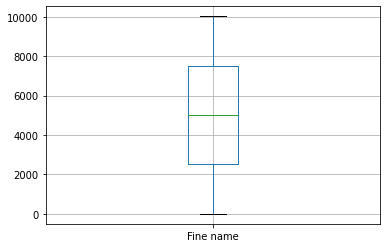

In [ ]:
random_df.boxplot(column=['Fine name'])

MISSING DATA IMPUTATION

In [ ]:
random_df['Fine name'] = random_df['Fine name'].fillna(random_df['Fine name'].median())

In [ ]:
random_df['Fine name'].isna().sum()

0

DATA ENCODING

In [ ]:
encoding = pd.get_dummies(random_df[['Class']])

In [ ]:
encoding

,Class
0,0
1,1
2,1
3,1
4,1
...,...
10018,1
10019,1
10020,1
10021,1


In [ ]:
encoded_df=pd.concat([random_df,encoding],axis=1)

In [ ]:
encoded_df.drop(columns=['Class','Fine name'],inplace=True)

In [ ]:
encoded_df

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors
0,75.0,376.0,2.0,363.0,24.0,0.0,0.0,1,3,21,...,2,1,1,4,1,1,1,1,1,0.0
1,15.0,256.0,1.0,16.0,0.0,0.0,0.0,1,2,34,...,2,1,2,1,1,1,1,1,1,0.0
2,76.0,355.0,1.0,16.0,16.0,0.0,0.0,0,4,6,...,2,1,2,1,1,1,1,1,1,0.0
3,9.0,298.0,1.0,10.0,14.0,0.0,0.0,1,3,21,...,1,1,1,2,1,1,1,17,2,0.0
4,17.0,180.0,1.0,10.0,0.0,0.0,0.0,1,2,8,...,2,2,1,1,1,1,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10018,7.0,180.0,1.0,10.0,0.0,0.0,0.0,1,2,21,...,1,1,1,2,1,1,1,2,2,0.0
10019,3.0,180.0,0.0,8.0,0.0,0.0,0.0,1,2,15,...,2,1,2,1,1,1,1,1,1,0.0
10020,33.0,330.0,2.0,20.0,13.0,0.0,0.0,19,3,10,...,2,1,2,1,1,1,1,1,1,0.0
10021,5.0,180.0,1.0,16.0,0.0,0.0,0.0,1,2,21,...,1,1,1,2,1,1,1,17,2,0.0


NORMALIZATION

In [ ]:
import pandas as pd
from sklearn import preprocessing

# assuming encoded_df is already defined as a pandas DataFrame with encoded categorical variables

x = encoded_df.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalize_df = pd.DataFrame(x_scaled)


In [ ]:
normalize_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.003191,0.004884,0.005034,0.001379,0.000325,0.2,0.166667,0.011364,0.75,0.428571,...,0.058824,0.025641,0.142857,0.444444,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
1,0.000672,0.003330,0.003356,0.000064,0.000013,0.2,0.166667,0.011364,0.50,0.693878,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
2,0.003233,0.004612,0.003356,0.000064,0.000221,0.2,0.166667,0.000000,1.00,0.122449,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
3,0.000420,0.003874,0.003356,0.000042,0.000195,0.2,0.166667,0.011364,0.75,0.428571,...,0.029412,0.025641,0.142857,0.222222,0.066667,0.166667,0.25,0.944444,0.333333,0.000176
4,0.000756,0.002345,0.003356,0.000042,0.000013,0.2,0.166667,0.011364,0.50,0.163265,...,0.058824,0.051282,0.142857,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10018,0.000336,0.002345,0.003356,0.000042,0.000013,0.2,0.166667,0.011364,0.50,0.428571,...,0.029412,0.025641,0.142857,0.222222,0.066667,0.166667,0.25,0.111111,0.333333,0.000176
10019,0.000168,0.002345,0.001678,0.000034,0.000013,0.2,0.166667,0.011364,0.50,0.306122,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
10020,0.001428,0.004288,0.005034,0.000080,0.000182,0.2,0.166667,0.215909,0.75,0.204082,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
10021,0.000252,0.002345,0.003356,0.000064,0.000013,0.2,0.166667,0.011364,0.50,0.428571,...,0.029412,0.025641,0.142857,0.222222,0.066667,0.166667,0.25,0.944444,0.333333,0.000176


In [ ]:
normalize_df.set_axis(encoded_df.columns,axis=1,inplace=True)

In [ ]:
normalize_df

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors
0,0.003191,0.004884,0.005034,0.001379,0.000325,0.2,0.166667,0.011364,0.75,0.428571,...,0.058824,0.025641,0.142857,0.444444,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
1,0.000672,0.003330,0.003356,0.000064,0.000013,0.2,0.166667,0.011364,0.50,0.693878,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
2,0.003233,0.004612,0.003356,0.000064,0.000221,0.2,0.166667,0.000000,1.00,0.122449,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
3,0.000420,0.003874,0.003356,0.000042,0.000195,0.2,0.166667,0.011364,0.75,0.428571,...,0.029412,0.025641,0.142857,0.222222,0.066667,0.166667,0.25,0.944444,0.333333,0.000176
4,0.000756,0.002345,0.003356,0.000042,0.000013,0.2,0.166667,0.011364,0.50,0.163265,...,0.058824,0.051282,0.142857,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10018,0.000336,0.002345,0.003356,0.000042,0.000013,0.2,0.166667,0.011364,0.50,0.428571,...,0.029412,0.025641,0.142857,0.222222,0.066667,0.166667,0.25,0.111111,0.333333,0.000176
10019,0.000168,0.002345,0.001678,0.000034,0.000013,0.2,0.166667,0.011364,0.50,0.306122,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
10020,0.001428,0.004288,0.005034,0.000080,0.000182,0.2,0.166667,0.215909,0.75,0.204082,...,0.058824,0.025641,0.285714,0.111111,0.066667,0.166667,0.25,0.055556,0.166667,0.000176
10021,0.000252,0.002345,0.003356,0.000064,0.000013,0.2,0.166667,0.011364,0.50,0.428571,...,0.029412,0.025641,0.142857,0.222222,0.066667,0.166667,0.25,0.944444,0.333333,0.000176


SPLITING DATA INTO TRAIN AN TEST

In [ ]:
X=normalize_df.iloc[:,:-1]

In [ ]:
y=normalize_df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,JS,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA
6627,0.000378,0.002345,0.003356,0.000045,0.000013,0.2,0.166667,0.011364,0.50,0.306122,...,0.387097,0.470588,0.025641,0.142857,0.111111,0.066667,0.166667,0.25,0.055556,0.166667
5146,0.001050,0.002980,0.021812,0.000186,0.000013,0.2,0.166667,0.011364,0.75,0.122449,...,0.032258,0.029412,0.025641,0.142857,0.111111,0.066667,0.166667,0.25,0.055556,0.166667
8492,0.000420,0.002345,0.003356,0.000038,0.000013,0.2,0.166667,0.011364,0.50,0.367347,...,0.387097,0.470588,0.025641,0.285714,0.222222,0.066667,0.166667,0.25,0.055556,0.166667
4111,0.001679,0.005040,0.003356,0.000428,0.000325,0.2,0.166667,0.011364,0.75,0.489796,...,0.032258,0.029412,0.025641,0.142857,0.444444,0.066667,0.166667,0.25,0.944444,0.166667
3723,0.003779,0.003407,0.003356,0.000083,0.000013,0.2,0.166667,0.022727,0.50,0.163265,...,0.032258,0.029412,0.025641,0.142857,0.111111,0.066667,0.166667,0.25,0.055556,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.003485,0.003550,0.006711,0.000330,0.000013,0.2,0.166667,0.011364,0.75,0.428571,...,0.032258,0.029412,0.025641,0.142857,0.111111,0.066667,0.166667,0.25,0.055556,0.166667
5191,0.000420,0.002345,0.003356,0.000038,0.000013,0.2,0.166667,0.011364,0.50,0.224490,...,0.032258,0.029412,0.025641,0.142857,0.111111,0.066667,0.166667,0.25,0.055556,0.166667
5390,0.000630,0.002915,0.001678,0.000080,0.000104,0.2,0.166667,0.011364,0.50,0.306122,...,0.516129,0.676471,0.025641,0.142857,0.222222,0.066667,0.166667,0.25,0.055556,0.166667
860,0.004073,0.004340,0.005034,0.002572,0.000195,0.2,0.166667,0.011364,0.75,0.489796,...,0.032258,0.029412,0.025641,0.142857,0.444444,0.066667,0.166667,0.25,0.222222,0.166667


In [ ]:
y_train

6627    0.000176
5146    0.000176
8492    0.000176
4111    0.000176
3723    0.000176
          ...   
5734    0.000176
5191    0.000176
5390    0.000176
860     0.000176
7270    0.000176
Name: Colors, Length: 7016, dtype: float64

 confusion matrix

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier



# Split the data into training and testing sets
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (e.g., decision tree)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Obtain predictions on the test set
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 880   11]
 [  15 1099]]


Classification report

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier



# Split the data into training and testing sets
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (e.g., decision tree)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Obtain predictions on the test set
y_pred = model.predict(X_test)

# Create the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       891
           1       0.99      0.99      0.99      1114

    accuracy                           0.99      2005
   macro avg       0.99      0.99      0.99      2005
weighted avg       0.99      0.99      0.99      2005

